In [1]:
import LanusStats as ls  
fbref = ls.Fbref()

In [70]:
prova = fbref.get_teams_season_stats('gca', 'Big 5 European Leagues', season='2024-2025', save_csv=False, stats_vs=False, change_columns_names=False, add_page_name=False)

prova2 = fbref.get_teams_season_stats('possession', 'Big 5 European Leagues', season='2024-2025', save_csv=False, stats_vs=False, change_columns_names=False, add_page_name=False)


Starting to scrape teams data from Fbref...
Starting to scrape teams data from Fbref...


In [71]:
df = prova.iloc[:, :12]

In [76]:
df["Att_Drib"] = prova2["Att"]

In [12]:
from matplotlib.font_manager import FontProperties
font_path_bold = "/Users/alfonsomarino/Desktop/Teko/static/Teko-SemiBold.ttf"
font_prop_bold = FontProperties(fname=font_path_bold)

font_path = '/Users/alfonsomarino/Desktop/Teko/static/Teko-Regular.ttf'  # Sostituisci con il percorso del tuo font
font_prop = FontProperties(fname=font_path)

font_path_med = "/Users/alfonsomarino/Desktop/Teko/static/Teko-Medium.ttf"
font_med = FontProperties(fname = font_path_med)

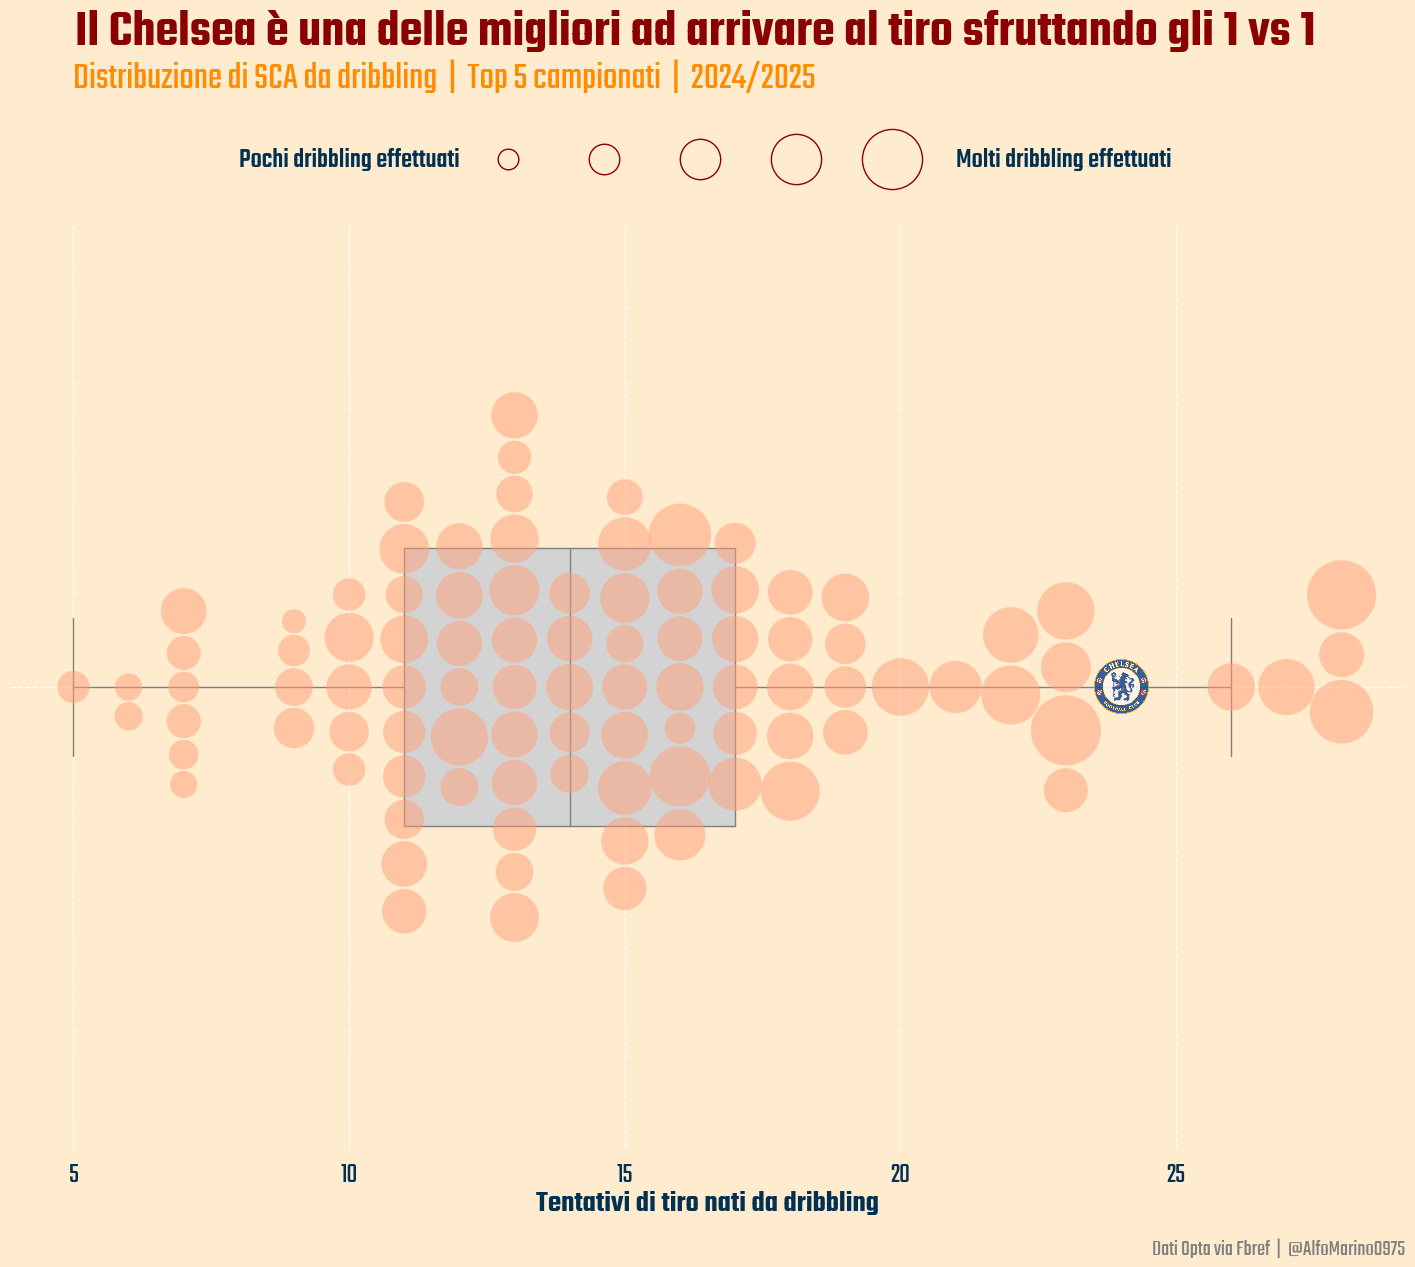

In [148]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import numpy as np
from matplotlib.lines import Line2D

def getImage(path):
    """Funzione per caricare l'immagine del logo"""
    return OffsetImage(plt.imread(path), zoom=0.0325, alpha=0.8)


# Assicuriamoci che Seaborn sia aggiornato allo stile grafico di Matplotlib
sns.set(style="whitegrid")

# Crea il grafico
fig, ax = plt.subplots(figsize=(18, 12), facecolor='blanchedalmond')
plt.gca().set_facecolor('blanchedalmond')

# Box plot della colonna 'TO'
sns.boxplot(x='TO', data=df, ax=ax, color='lightgray', width=0.3, fliersize=0)


# Beeswarm plot orizzontale della colonna 'TO'
sns.swarmplot(x='TO', data=df, color='lightsalmon', s= df["Att_Drib"]/6, ax=ax, orient='h', alpha = 0.5)

# Titolo e descrizione
plt.title('Il Chelsea è una delle migliori ad arrivare al tiro sfruttando gli 1 vs 1', 
          fontproperties=font_prop_bold, fontsize=38, color="darkred", pad=130, loc = "center", x = 0.491)
fig.text(0.16, 0.995, "Distribuzione di SCA da dribbling  |  Top 5 campionati  |  2024/2025", 
         fontproperties=font_prop, fontsize=28, color="darkorange")

# Personalizza le etichette dell'asse x e y
plt.xticks(fontproperties=font_prop, fontsize=20, color='#003153')
#plt.yticks(fontproperties=font_prop, fontsize=15, color='#003153')
ax.set_xlabel('Tentativi di tiro nati da dribbling', fontproperties=font_prop_bold, fontsize=22, color='#003153')
#ax.set_ylabel('', fontproperties=font_prop, fontsize=20, color='#003153')  # Asse y vuoto perché è un Beeswarm orizzontale

# Rimuove le spine non necessarie
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Griglia personalizzata
ax.grid(True, color="white", linestyle='--', linewidth=1)

# Trova la posizione del Chelsea e aggiungi il logo
chelsea_row = df[df['Squad'] == 'Chelsea']
if not chelsea_row.empty:
    chelsea_x = chelsea_row['TO'].values[0]  # Valore TO per il Chelsea
    logo_path = '/Users/alfonsomarino/Desktop/loghi europa/Chelsea.svg.png'  # Sostituisci con il percorso effettivo dell'immagine del logo del Chelsea
    ab = AnnotationBbox(getImage(logo_path), (chelsea_x, 0), frameon=False, box_alignment=(0.5, 0.5))
    ax.add_artist(ab)

# Testo di riferimento
fig.text(0.90, 0.02, 'Dati Opta via Fbref  |  @AlfoMarino0975', fontproperties=font_prop, fontsize=16, color='gray', 
         ha='right', va='bottom')

# Define the sizes for the dots in the legend based on the values of df[“Min”]
sizes = [min_value for min_value in np.linspace((df["Att_Drib"]).min(), df["Att_Drib"].max(), 5)]

# Legend
legend_elements = [Line2D([0], [0], marker='o', color='w', 
                            markersize=size/7, markerfacecolor='none', markeredgecolor='darkred', linewidth=0) for size in sizes]

plt.legend(handles=legend_elements, loc='upper center', frameon=False, fontsize='large', ncol=len(sizes), bbox_to_anchor=(0.5, 1.1))
ax.text(12, -0.572, "Pochi dribbling effettuati", fontsize=20, color='#003153', ha='right', va='center', fontproperties= font_med)
ax.text(21, -0.572, "Molti dribbling effettuati", fontsize=20, color='#003153', ha='left', va='center', fontproperties= font_med)


plt.savefig("/Users/alfonsomarino/Desktop/beeswarm_sca.png", bbox_inches='tight', dpi=300)

plt.show()


In [96]:
df.sort_values(by='TO', ascending=False).head(20)

,Rk,Squad,Comp,# Pl,90s,SCA,SCA90,PassLive,PassDead,TO,Sh,Fld,Att_Drib
58,59,Milan,it Serie A,25,11.0,299,27.18,211,22,28,19,14,194
72,73,Real Madrid,es La Liga,22,12.0,344,28.67,245,31,28,22,11,299
78,79,Sevilla,es La Liga,27,13.0,279,21.46,194,25,28,18,12,275
10,11,Bayern Munich,de Bundesliga,22,10.0,343,34.30,261,21,27,19,12,243
28,29,Fiorentina,it Serie A,27,12.0,305,25.42,220,22,26,16,17,205
20,21,Chelsea,eng Premier League,23,11.0,278,25.27,219,12,24,10,10,231
32,33,Getafe,es La Liga,25,13.0,286,22.00,181,40,23,16,22,248
77,78,Saint-Étienne,fr Ligue 1,27,11.0,223,20.27,148,20,23,14,13,190
23,24,Dortmund,de Bundesliga,25,10.0,238,23.80,169,19,23,17,7,216
9,10,Barcelona,es La Liga,25,13.0,381,29.31,277,29,23,28,19,303
